In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Линейная регрессия и основные библиотеки Python для анализа данных и научных вычислений

## Задание 1. Первичный анализ данных c Pandas

В этом заданиии мы будем использовать данные [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) по росту и весу 25 тысяч подростков.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.optimize as opt
%matplotlib inline

In [ ]:
path = "/-/"
data = pd.read_csv(path+'weights_heights.csv', index_col='Index')

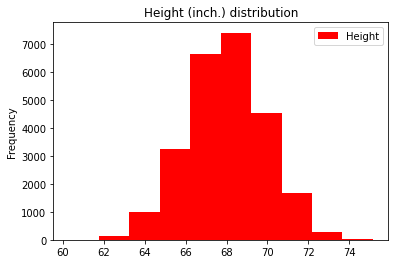

In [ ]:
data.plot(y='Height', kind='hist', color='red',  title='Height (inch.) distribution')

**[2]**. Посмотрите на первые 5 записей с помощью метода *head* Pandas DataFrame. Нарисуйте гистограмму распределения веса с помощью метода *plot* Pandas DataFrame. Сделайте гистограмму зеленой, подпишите картинку.

In [ ]:
data.head()

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


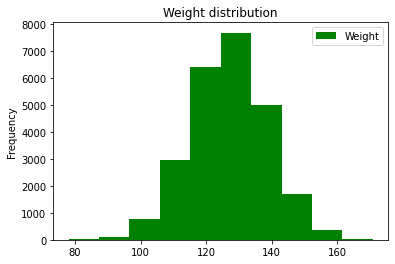

In [ ]:
data.plot(y="Weight", kind="hist", color="green", title="Weight distribution")

Один из эффективных методов первичного анализа данных - отображение попарных зависимостей признаков. Создается $m \times m$ графиков (*m* - число признаков), где по диагонали рисуются гистограммы распределения признаков, а вне диагонали - scatter plots зависимости двух признаков. Это можно делать с помощью метода $scatter\_matrix$ Pandas Data Frame или *pairplot* библиотеки Seaborn. 

Чтобы проиллюстрировать этот метод, интересней добавить третий признак. Создадим признак *Индекс массы тела* ([BMI](https://en.wikipedia.org/wiki/Body_mass_index)). Для этого воспользуемся удобной связкой метода *apply* Pandas DataFrame и lambda-функций Python.

In [ ]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / (height_inch / METER_TO_INCH) ** 2

In [ ]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], row['Weight']), axis=1)
data

,Height,Weight,BMI
Index,,,
1,65.78331,112.9925,18.357573
2,71.51521,136.4873,18.762577
3,69.39874,153.0269,22.338895
4,68.21660,142.3354,21.504526
5,67.78781,144.2971,22.077581
...,...,...,...
24996,69.50215,118.0312,17.178982
24997,64.54826,120.1932,20.281866
24998,64.69855,118.2655,19.863971


**[3].** Постройте картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга. Используйте метод *pairplot* библиотеки Seaborn.

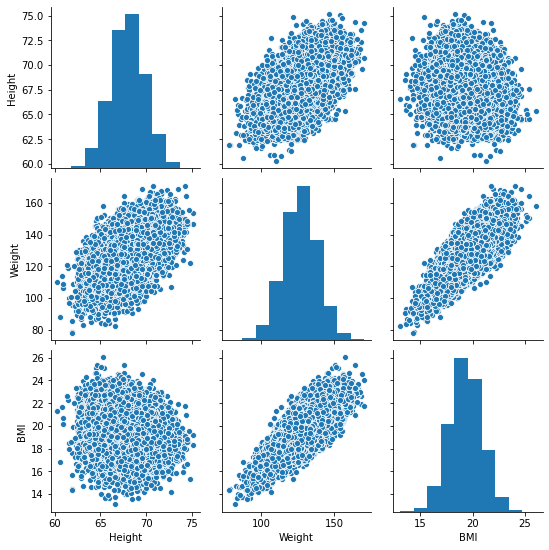

In [ ]:
sns.pairplot(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2fd234d978>,
      dtype=object)

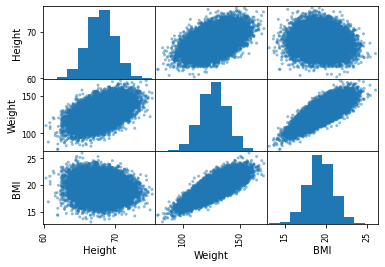

In [ ]:
pd.plotting.scatter_matrix(data)

Часто при первичном анализе данных надо исследовать зависимость какого-то количественного признака от категориального (скажем, зарплаты от пола сотрудника). В этом помогут "ящики с усами" - boxplots библиотеки Seaborn. Box plot - это компактный способ показать статистики вещественного признака (среднее и квартили) по разным значениям категориального признака. Также помогает отслеживать "выбросы" - наблюдения, в которых значение данного вещественного признака сильно отличается от других. 

**[4]**. Создайте в DataFrame *data* новый признак *weight_category*, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес  больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Постройте «ящик с усами» (boxplot), демонстрирующий зависимость роста от весовой категории. Используйте метод *boxplot* библиотеки Seaborn и метод *apply* Pandas DataFrame. Подпишите ось *y* меткой «Рост», ось *x* – меткой «Весовая категория».

         Height    Weight        BMI  weight_cat
Index                                           
1      65.78331  112.9925  18.357573           1
2      71.51521  136.4873  18.762577           2
3      69.39874  153.0269  22.338895           3
4      68.21660  142.3354  21.504526           2
5      67.78781  144.2971  22.077581           2


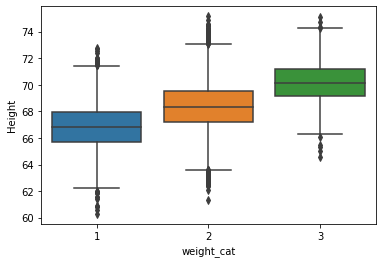

In [ ]:
def weight_category(weight):
    if weight < 120: return 1
    if weight >=150: return 3
    return 2
    # Ваш код здесь

data['weight_cat'] = data['Weight'].apply(weight_category)
print(data.head())
sns.boxplot(x='weight_cat', y='Height', data = data)

То есть здесь видим медиану, верхний и нижний квартиль, максимальное и минимальное значение, а также выбросы. То есть это по сути распределение вероятностей. И таким образом мы можем сравнивать распределениям различных групп.
![Замещающий текст](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png)

**[5].** Постройте scatter plot зависимости роста от веса, используя метод *plot* для Pandas DataFrame с аргументом *kind='scatter'*. Подпишите картинку.

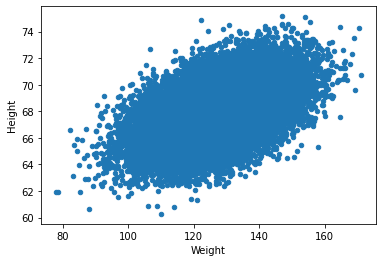

In [ ]:
data.plot(x='Weight',y='Height', kind='scatter')

## Задание 2. Минимизация квадратичной ошибки

В простейшей постановке задача прогноза значения вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной функции ошибки. 

**[6].** Напишите функцию, которая по двум параметрам $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных. 

In [ ]:
def error_square(w_0, w_1):
  error = data['Height'] - (w_0 + np.dot(w_1, data['Weight']))
  return np.sum(np.dot(error,error))

Итак, мы решаем задачу: как через облако точек, соответсвующих наблюдениям в нашем наборе данных, в пространстве признаков "Рост" и "Вес" провести прямую линию так, чтобы минимизировать функционал из п. 6. Для начала давайте отобразим хоть какие-то прямые и убедимся, что они плохо передают зависимость роста от веса.

**[7].** Проведите на графике из п. 5 Задания 1 две прямые, соответствующие значениям параметров ($w_0, w_1) = (60, 0.05)$ и ($w_0, w_1) = (50, 0.16)$. Используйте метод *plot* из *matplotlib.pyplot*, а также метод *linspace* библиотеки NumPy. Подпишите оси и график.

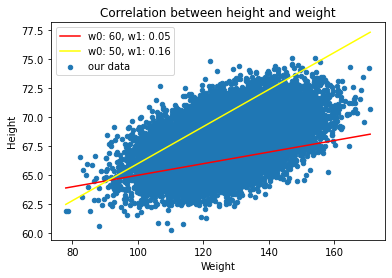

In [ ]:
weight_1, weight_2 = (60,0.05), (50, 0.16)
x = np.linspace(data['Weight'].min(),data['Weight'].max(),100)
y_1 = weight_1[0]+np.dot(weight_1[1], x)
y_2 = weight_2[0]+np.dot(weight_2[1], x)
data.plot(x='Weight',y='Height', kind='scatter', label='our data')
plt.plot(x, y_1, color='red', label = 'w0: {}, w1: {}'.format(weight_1[0], weight_1[1]))
plt.plot(x, y_2, color = 'yellow', label = 'w0: {}, w1: {}'.format(weight_2[0], weight_2[1]))
plt.legend()
plt.title('Correlation between height and weight')
plt.show()

Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Посмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

**[8].** Постройте график зависимости функции ошибки, посчитанной в п. 6, от параметра $w_1$ при $w_0$ = 50. Подпишите оси и график.

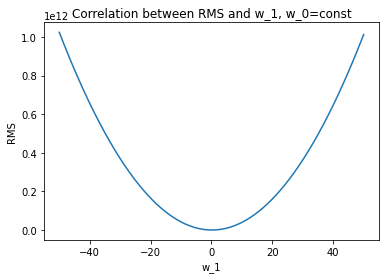

In [ ]:
w_0, w_1 = 50, np.linspace(-50, 50, 1000)
errors = [error_square(w_0, k) for k in w_1]
plt.plot(w_1, errors)
plt.xlabel('w_1')
plt.ylabel('RMS')
plt.title('Correlation between RMS and w_1, w_0=const')
plt.show()

Теперь методом оптимизации найдем "оптимальный" наклон прямой, приближающей зависимость роста от веса, при фиксированном коэффициенте $w_0 = 50$.

**[9].** С помощью метода *minimize_scalar* из *scipy.optimize* найдите минимум функции, определенной в п. 6, для значений параметра  $w_1$ в диапазоне [-5,5]. Проведите на графике из п. 5 Задания 1 прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (50, $w_1\_opt$), где $w_1\_opt$ – найденное в п. 8 оптимальное значение параметра $w_1$. 

In [ ]:
optimum = opt.minimize_scalar(lambda w: error_square(w_0,w), bounds=[-5,5])
w1_opt = optimum.x

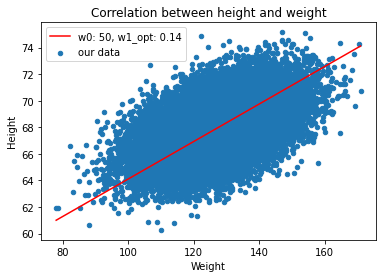

In [ ]:
x = np.linspace(data['Weight'].min(), data['Weight'].max(), 100)
y_1 = w_0 + np.dot(w1_opt, x)
data.plot(x='Weight', y='Height', kind='scatter', label='our data')
plt.plot(x, y_1, color='red', label = 'w0: {}, w1_opt: {}'.format(w_0, round(w1_opt,2)))
plt.legend()
plt.title('Correlation between height and weight')
plt.show()

При анализе многомерных данных человек часто хочет получить интуитивное представление о природе данных с помощью визуализации. Увы, при числе признаков больше 3 такие картинки нарисовать невозможно. На практике для визуализации данных в 2D и 3D в данных выделаяют 2 или, соответственно, 3 главные компоненты (как именно это делается - мы увидим далее в курсе) и отображают данные на плоскости или в объеме. 

Посмотрим, как в Python рисовать 3D картинки, на примере отображения функции $z(x,y) = sin(\sqrt{x^2+y^2})$ для значений $x$ и $y$ из интервала [-5,5] c шагом 0.25.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

Создаем объекты типа matplotlib.figure.Figure (рисунок) и  matplotlib.axes._subplots.Axes3DSubplot (ось). 

(40, 40) (40, 40) (40, 40)


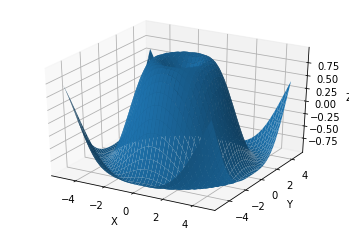

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))
print(X.shape, Y.shape, Z.shape)
# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

**[10].** Постройте 3D-график зависимости функции ошибки, посчитанной в п.6 от параметров $w_0$ и $w_1$. Подпишите ось $x$ меткой «Intercept», ось $y$ – меткой «Slope», a ось $z$ – меткой «Error».

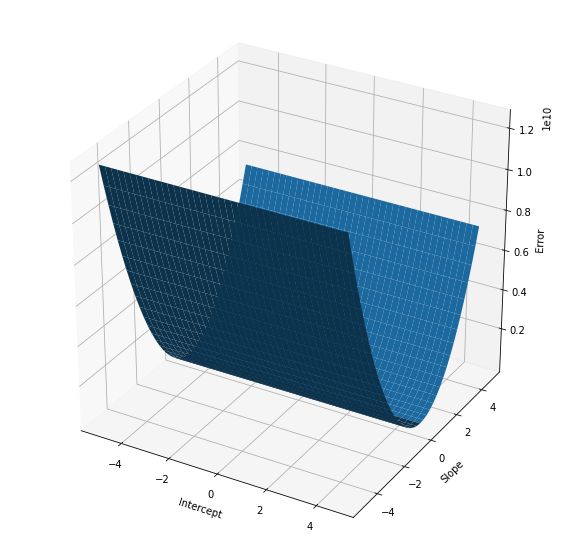

In [ ]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = fig.gca(projection='3d')
w_0 = np.arange(-5, 5, 0.25)
w_1 = np.arange(-5, 5, 0.25)
errors = np.array(list(map(error_square, w_0, w_1)))
errors = errors.reshape(errors.shape[0], 1)
w_0, w_1 = np.meshgrid(w_0, w_1)
surf = ax.plot_surface(w_0, w_1, errors)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

**[11].** С помощью метода *minimize* из scipy.optimize найдите минимум функции, определенной в п. 6, для значений параметра $w_0$ в диапазоне [-100,100] и $w_1$ - в диапазоне [-5, 5]. Начальная точка – ($w_0$, $w_1$) = (0, 0). Используйте метод оптимизации L-BFGS-B (аргумент method метода minimize). Проведите на графике из п. 5 Задания 1 прямую, соответствующую найденным оптимальным значениям параметров $w_0$ и $w_1$. Подпишите оси и график.

In [ ]:
def error_square(weight):
  error = data['Height'] - (weight[0] + np.dot(weight[1], data['Weight']))
  return np.sum(np.dot(error,error))
weight_opt = opt.minimize(fun= error_square, x0=(0,0), method = 'L-BFGS-B', bounds=([-100,100],[-5,5])).x

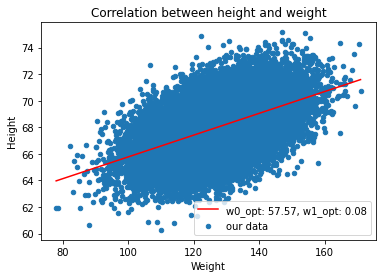

In [ ]:
data.plot(x='Weight', y='Height', kind='scatter', label='our data')
x = np.linspace(data['Weight'].min(), data['Weight'].max())
y = weight_opt[0]+np.dot(weight_opt[1], x)
plt.plot(x, y, color='red', label = 'w0_opt: {}, w1_opt: {}'.format(weight_opt[0].round(2), weight_opt[1].round(2)))
plt.legend()
plt.title('Correlation between height and weight')
plt.show()